# Introducción

**Contexto comercial:** 

Diagnostiya SAS es un grupo empresarial colombiano con 15 años de experiencia realizando inspecciones técnico-vehiculares, y que cuenta con 5 sedes en ubicadas en la ciudad de Bogotá, cada una de las sedes opera durante todos los días del año (Como única excepción navidad y año nuevo). Cada sede recibe diferentes tipos de vehículo y para cada tipo de vehículo existe un grupo de trabajo especializado que se encarga de la inspección de los vehículos.

Para el grupo empresarial Diagnostiya es un objetivo importante fomentar el desarrollo profesional de su personal y la mejora continua de sus procesos. Como parte de esta mejora continua pretende iniciar proyectos de ciencias de datos que le permitan conocer la información que posee. En este caso busca mantener la calidad de su servicio durante todo el año, lo cual será el objetivo de este proyecto.

**Problema comercial:** 

Suele ser frecuente que se presenten casos en los que una sede en particular tiene un flujo mayor de vehículos, se traslada personal de una sede a otra (según la disponibilidad) o se contrata personal temporal de apoyo con el fin de asegurar que la carga laboral y la calidad del servicio no se vean afectadas, no obstante, en varias ocasiones estos casos no son previstos con el suficiente tiempo de antelación.

El área de gestión humana del grupo empresarial espera que se genere un modelo que prediga cuales son los momentos en los cuales se requiere de mayor numero de personal en las diferentes sedes de la compañía.

**Contexto analítico:** 

Tenemos la base de datos con las ventas del grupo empresarial Diagnostiya SAS de inspecciones técnico-vehiculares durante el año 2022.

Se tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas.


# Preguntas
* ¿Cuáles son los periodos con mayores ingresos de vehículos?
* ¿Cuáles son los tipos de vehículos con mayores ingresos en cada sede?
* ¿Cuáles sedes reciben más vehículos por tipo de revisión?

# Objetivo

Se pretende predecir el comportamiento del flujo de vehículos en las diferentes sedes por los distintos periodos del año, esto con el fin de optimizar los horarios, periodos de descanso, permisos, vacaciones e identificar los momentos en los cuales será necesario contratar personal de apoyo

# Hipótesis

*   Hipótesis A: Se estima que los viernes y sábados son los días con mayor número de ingresos en la semana
*   Hipótesis B: Los meses en los que hay periodos de vacaciones escolares (Junio, Julio, Diciembre y Enero) presentan un aumento en los ingresos

# Definición del data set

Definicion de la data:

* id: Identificador del registro
* idsede: Identificador de la sede
* sede: Nombre de la sede (Sucursal del grupo empresarial en la que se tomó el servicio)
* idcargo: Identificador del cargo
* cargo: Nombre del cargo (Cargo o Area a la que pertenece el empleado que gestiono la venta del servicio)
* asesor: Identificador del asesor que realizo la venta
* Nombres: Nombre del asesor que realizo la venta
* Apellidos: Apellido del asesor que realizo la venta
* idvehiculo: Identificador del tipo de vehículo
* tipo_vehiculo: Nombre del tipo de vehículo (Clasificación del vehículo según su categoría)
* idservicio: Identificador del tipo de servicio del vehículo
* tipo_servicio: Nombre del tipo de servicio del vehículo (Publico o Particular)
* idrevision: Identificador del tipo de servicio del revisión
* tipo_revision: Nombre del tipo de servicio del revisión (RTM si es oficial o Preventiva no oficial)
* fecha: Fecha en la que se realizó el servicio
* cantidad: Cantidad de servicios prestados
* base: Valor total base de los servicios prestados (Sin impuestos)
* valor: Valor total valor de los servicios prestados (Con impuestos)

Datos relevantes para el análisis: 

* sede: Podremos definir las sedes con mas servicios prestados
* cargo: Podremos definir el cargo que mas servicios trae
* tipo_vehiculo: Identificar cuales tipos de vehiculos a los cuales se les presta mas servicios
* tipo_servicio: Identificar los tipos de servicio a los cuales se les presta mas servicios
* tipo_revision: Identificar cuales son los tipos de revisiones a los cuales se les presta mas servicios
* fecha: Establecer cuales son los periodos del año en los cuales se reciben mas revisiones
* cantidad: Calcular los servicios prestados por las categorias anteriores
* base: Calcular el valor base de los servicios prestados por las categorias anteriores
* valor: Calcular el valor total los servicios prestados por las categorias anteriores

# Importación de librerías 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Importación del dataset

In [2]:
ds = pd.read_csv('Historicos_revisiones_2022.csv',sep=';', encoding='latin1')

ds['fecha'] = pd.to_datetime(ds['fecha'],dayfirst=True)
ds['mes'] = pd.to_datetime(ds['fecha']).dt.to_period('m')

ds['mes'] = ds['mes'].astype(str)

ds['dia'] = ds['fecha'].dt.weekday

ds['semana'] = ds['fecha'].dt.strftime("%U")

# Preparación de los datos para generar los gráficos 

In [3]:
revxtipovehiculo = ds.groupby('tipo_vehiculo')['cantidad'].sum()
revxmes = ds.groupby('mes')['cantidad'].sum()
revxfecha = ds.groupby('fecha')['cantidad'].sum()
revxdia = ds.groupby('dia')['cantidad'].mean()
revxsemana = ds.groupby('semana')['cantidad'].sum()

# Outliers

<AxesSubplot:title={'center':'Revisiones por mes - Outliers'}, xlabel='mes', ylabel='cantidad'>

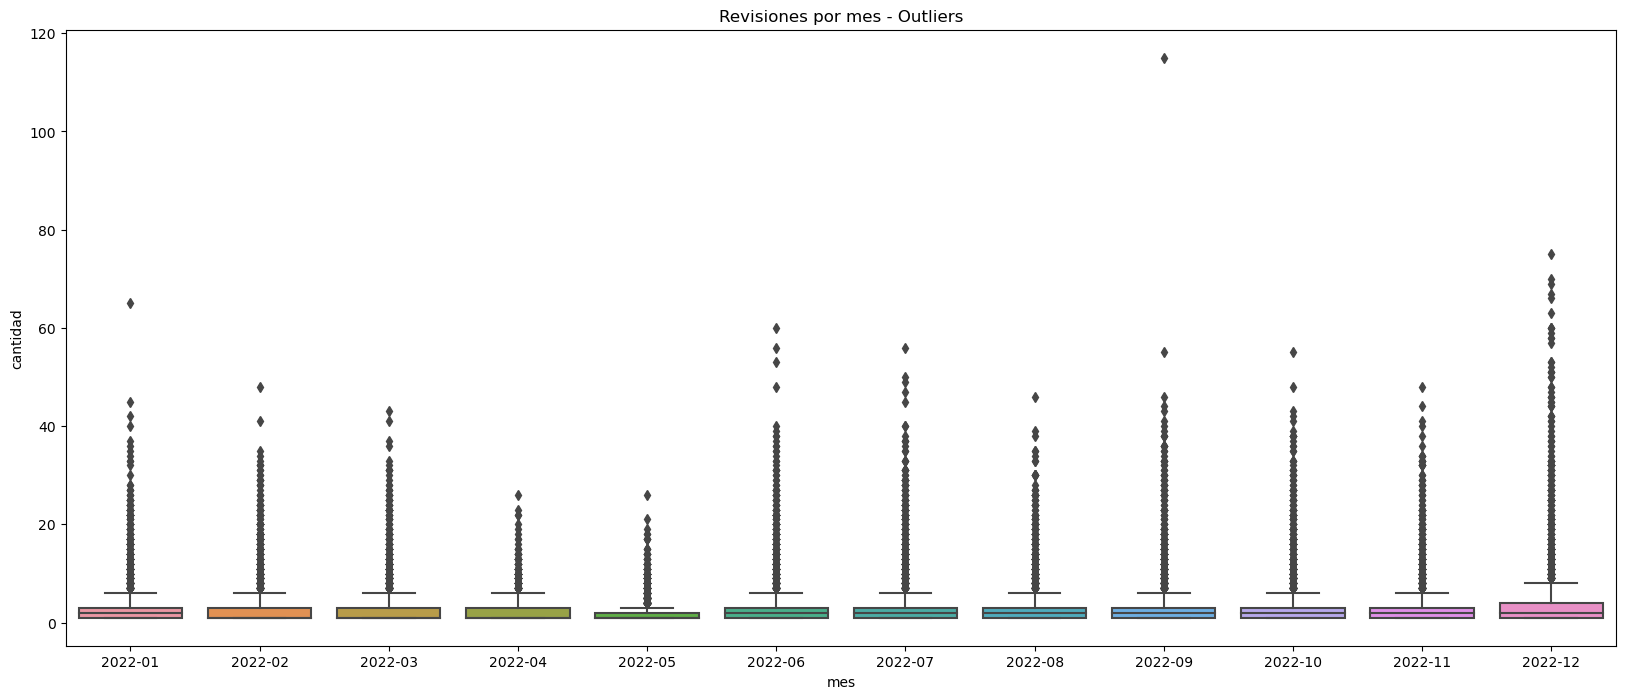

In [4]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_title('Revisiones por mes - Outliers')
sns.boxplot(x=ds['mes'], y=ds['cantidad'])

In [5]:
dict = {}
var_carteg = ['sede', 'tipo_vehiculo', 'tipo_servicio', 'tipo_revision', 'mes', 'semana', 'dia']
var_num = ['cantidad']

In [6]:
for col in var_num:
    percentile25 = ds[col].quantile(0.25)
    percentile75 = ds[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit 

In [7]:
for col in var_num:
    print('Total {} de clientes con {} menor al limite inferior.'.format(len(ds[ds[col] < dict['lower_limit_' + col]] ) , col))
    print('Total {} de clientes con {} mayor al limite superior.'.format(len(ds[ds[col] > dict['upper_limit_' + col]] ) , col))

Total 0 de clientes con cantidad menor al limite inferior.
Total 4950 de clientes con cantidad mayor al limite superior.


In [8]:
ds.shape

(44962, 21)

El 11% de los registros del dataset tiene valores por encima del límite superior, con el fin de disminuir el riesgo en el modelo se les asignara el valor del límite superior para estandarizar un poco el dataset 

In [9]:
for col in var_num:
    ds[col] = np.where(
        ds[col] > dict['upper_limit_' + col], # si se comple
        dict['upper_limit_' + col], # poner limite superior (Q3+1.5IQR)
        np.where( # en caso contrario
            ds[col] < dict['lower_limit_' + col], # si es menor al limite inferior
            dict['lower_limit_' + col], # poner el Q1-1.5IQR
            ds[col]  # si no se cumple nada dejar quieto
        )
    )

Se verifica la reducción de outliers

<AxesSubplot:title={'center':'Revisiones por mes - Outliers'}, xlabel='mes', ylabel='cantidad'>

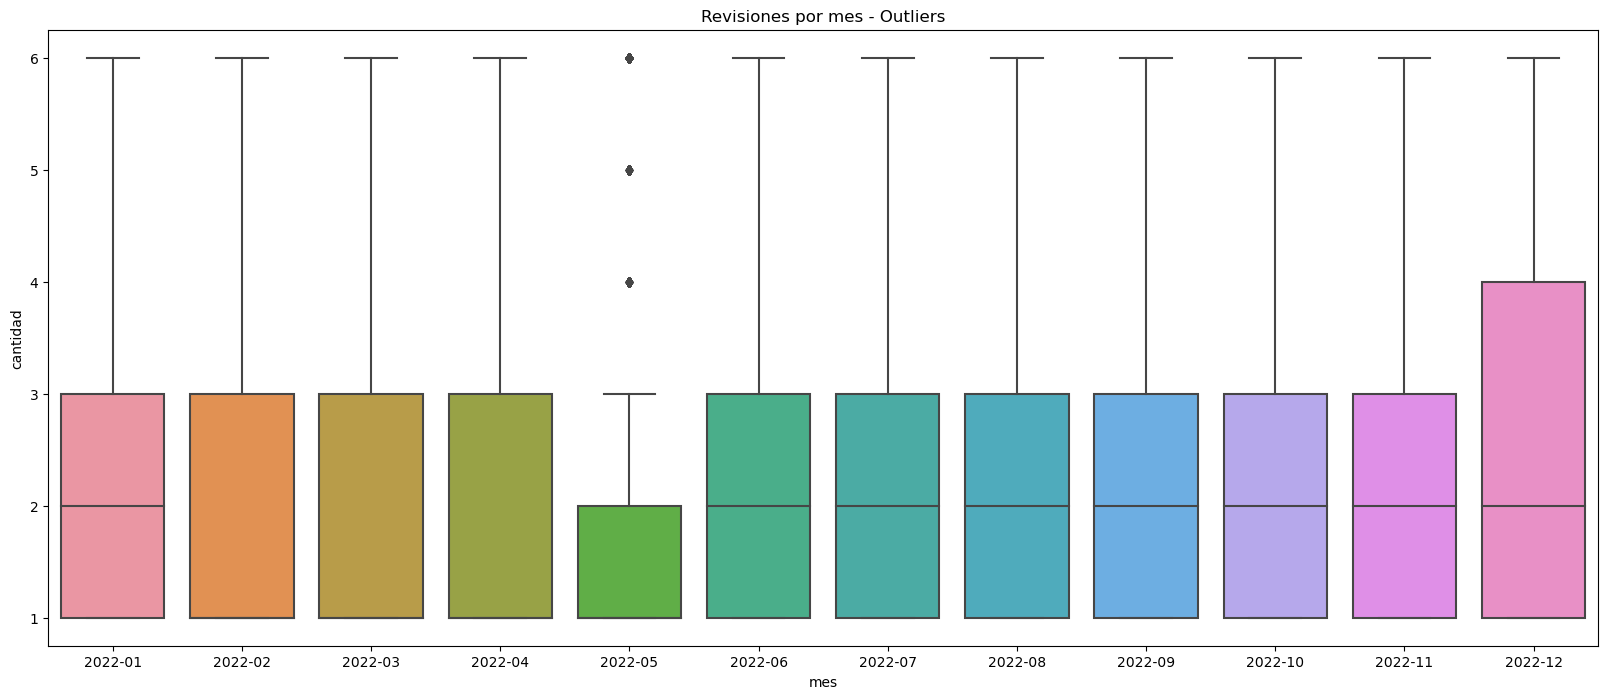

In [10]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_title('Revisiones por mes - Outliers')
sns.boxplot(x=ds['mes'], y=ds['cantidad'])

# EDA - Análisis univariado

# Revisiones durante el año 2022

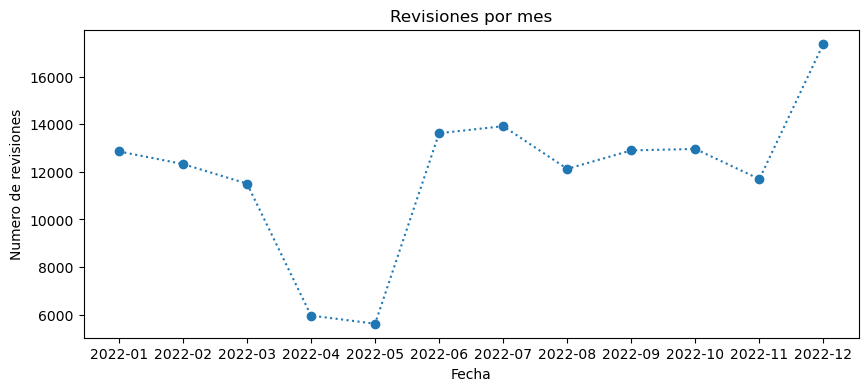

In [11]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(revxmes.index, revxmes.values, 'o:')
ax.set_title('Revisiones por mes')
ax.set_xlabel('Fecha')
ax.set_ylabel('Numero de revisiones')
plt.show()

Se identifica que el número de revisiones durante el año 2022 este alrededor de las 12000 y 14000 revisiones por mes, evidenciando un pico fuerte por debajo en los meses de abril y mayo con alrededor de 6000 revisiones, y un pico por encima en el mes de diciembre con más de 17000 revisiones.

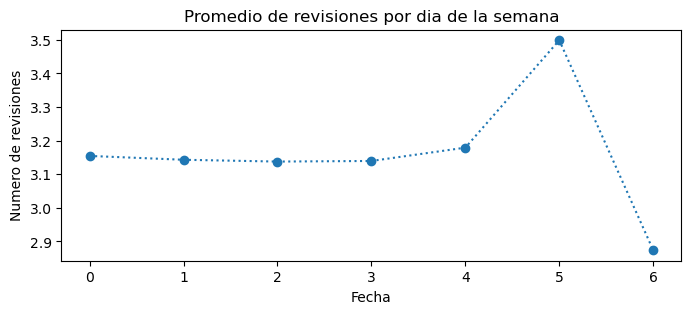

In [12]:
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(revxdia.index, revxdia.values, 'o:')
ax.set_title('Promedio de revisiones por dia de la semana')
ax.set_xlabel('Fecha')
ax.set_ylabel('Numero de revisiones')
plt.show()

También podemos ver que de lunes a viernes se reciben en promedio una cantidad muy similar de vehículos, para los sábados se evidencia un incremento en el promedio de revisiones, y el domingo el número de revisiones disminuye considerablemente

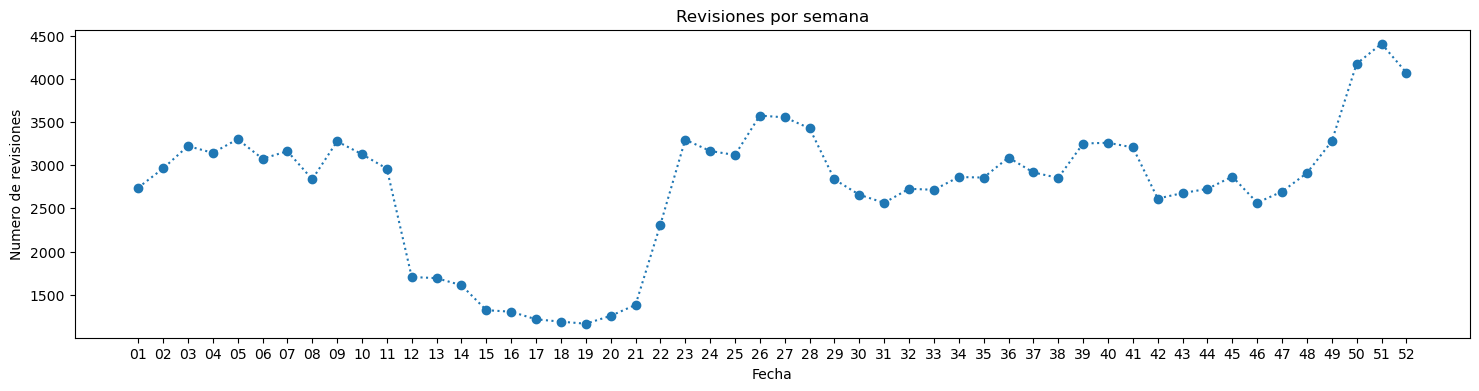

In [14]:
fig, ax = plt.subplots(figsize=(18,4))
ax.plot(revxsemana.index, revxsemana.values, 'o:')
ax.set_title('Revisiones por semana')
ax.set_xlabel('Fecha')
ax.set_ylabel('Numero de revisiones')
plt.show()

Finalmente, al ver las revisiones por semana notamos variaciones importantes en cortos periodos de tiempo, como una disminución de alrededor de 1500 revisiones de la semana 11 a la 12, un incremento cercano a las 2000 revisiones de la semana 21 a la 23, y un incremento de casi 1000 revisiones de la semana 49 a la semana 50, por lo que se presume que la semana puede ser un factor más importante que el mes al momento de realizar el modelo

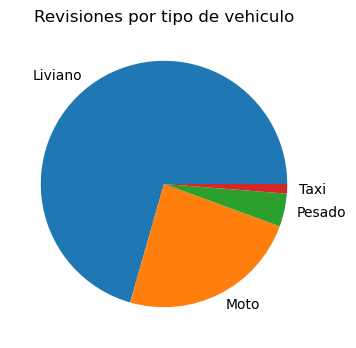

In [16]:
fig, ax = plt.subplots(figsize=(7,4))
ax.pie(revxtipovehiculo.values, labels=revxtipovehiculo.index)
ax.set_title('Revisiones por tipo de vehiculo')
plt.show()

Durante el periodo evaluado en el data set, los vehículos livianos son los que más número de revisiones han tenido con casi tres cuartas partes del total de revisiones del año.  Las motos por su parte  también tienen una importante participación con casi un cuarto del total de vehículos.

# EDA - Análisis multivariado

# Revisiones por fecha, sede y tipo de vehículo

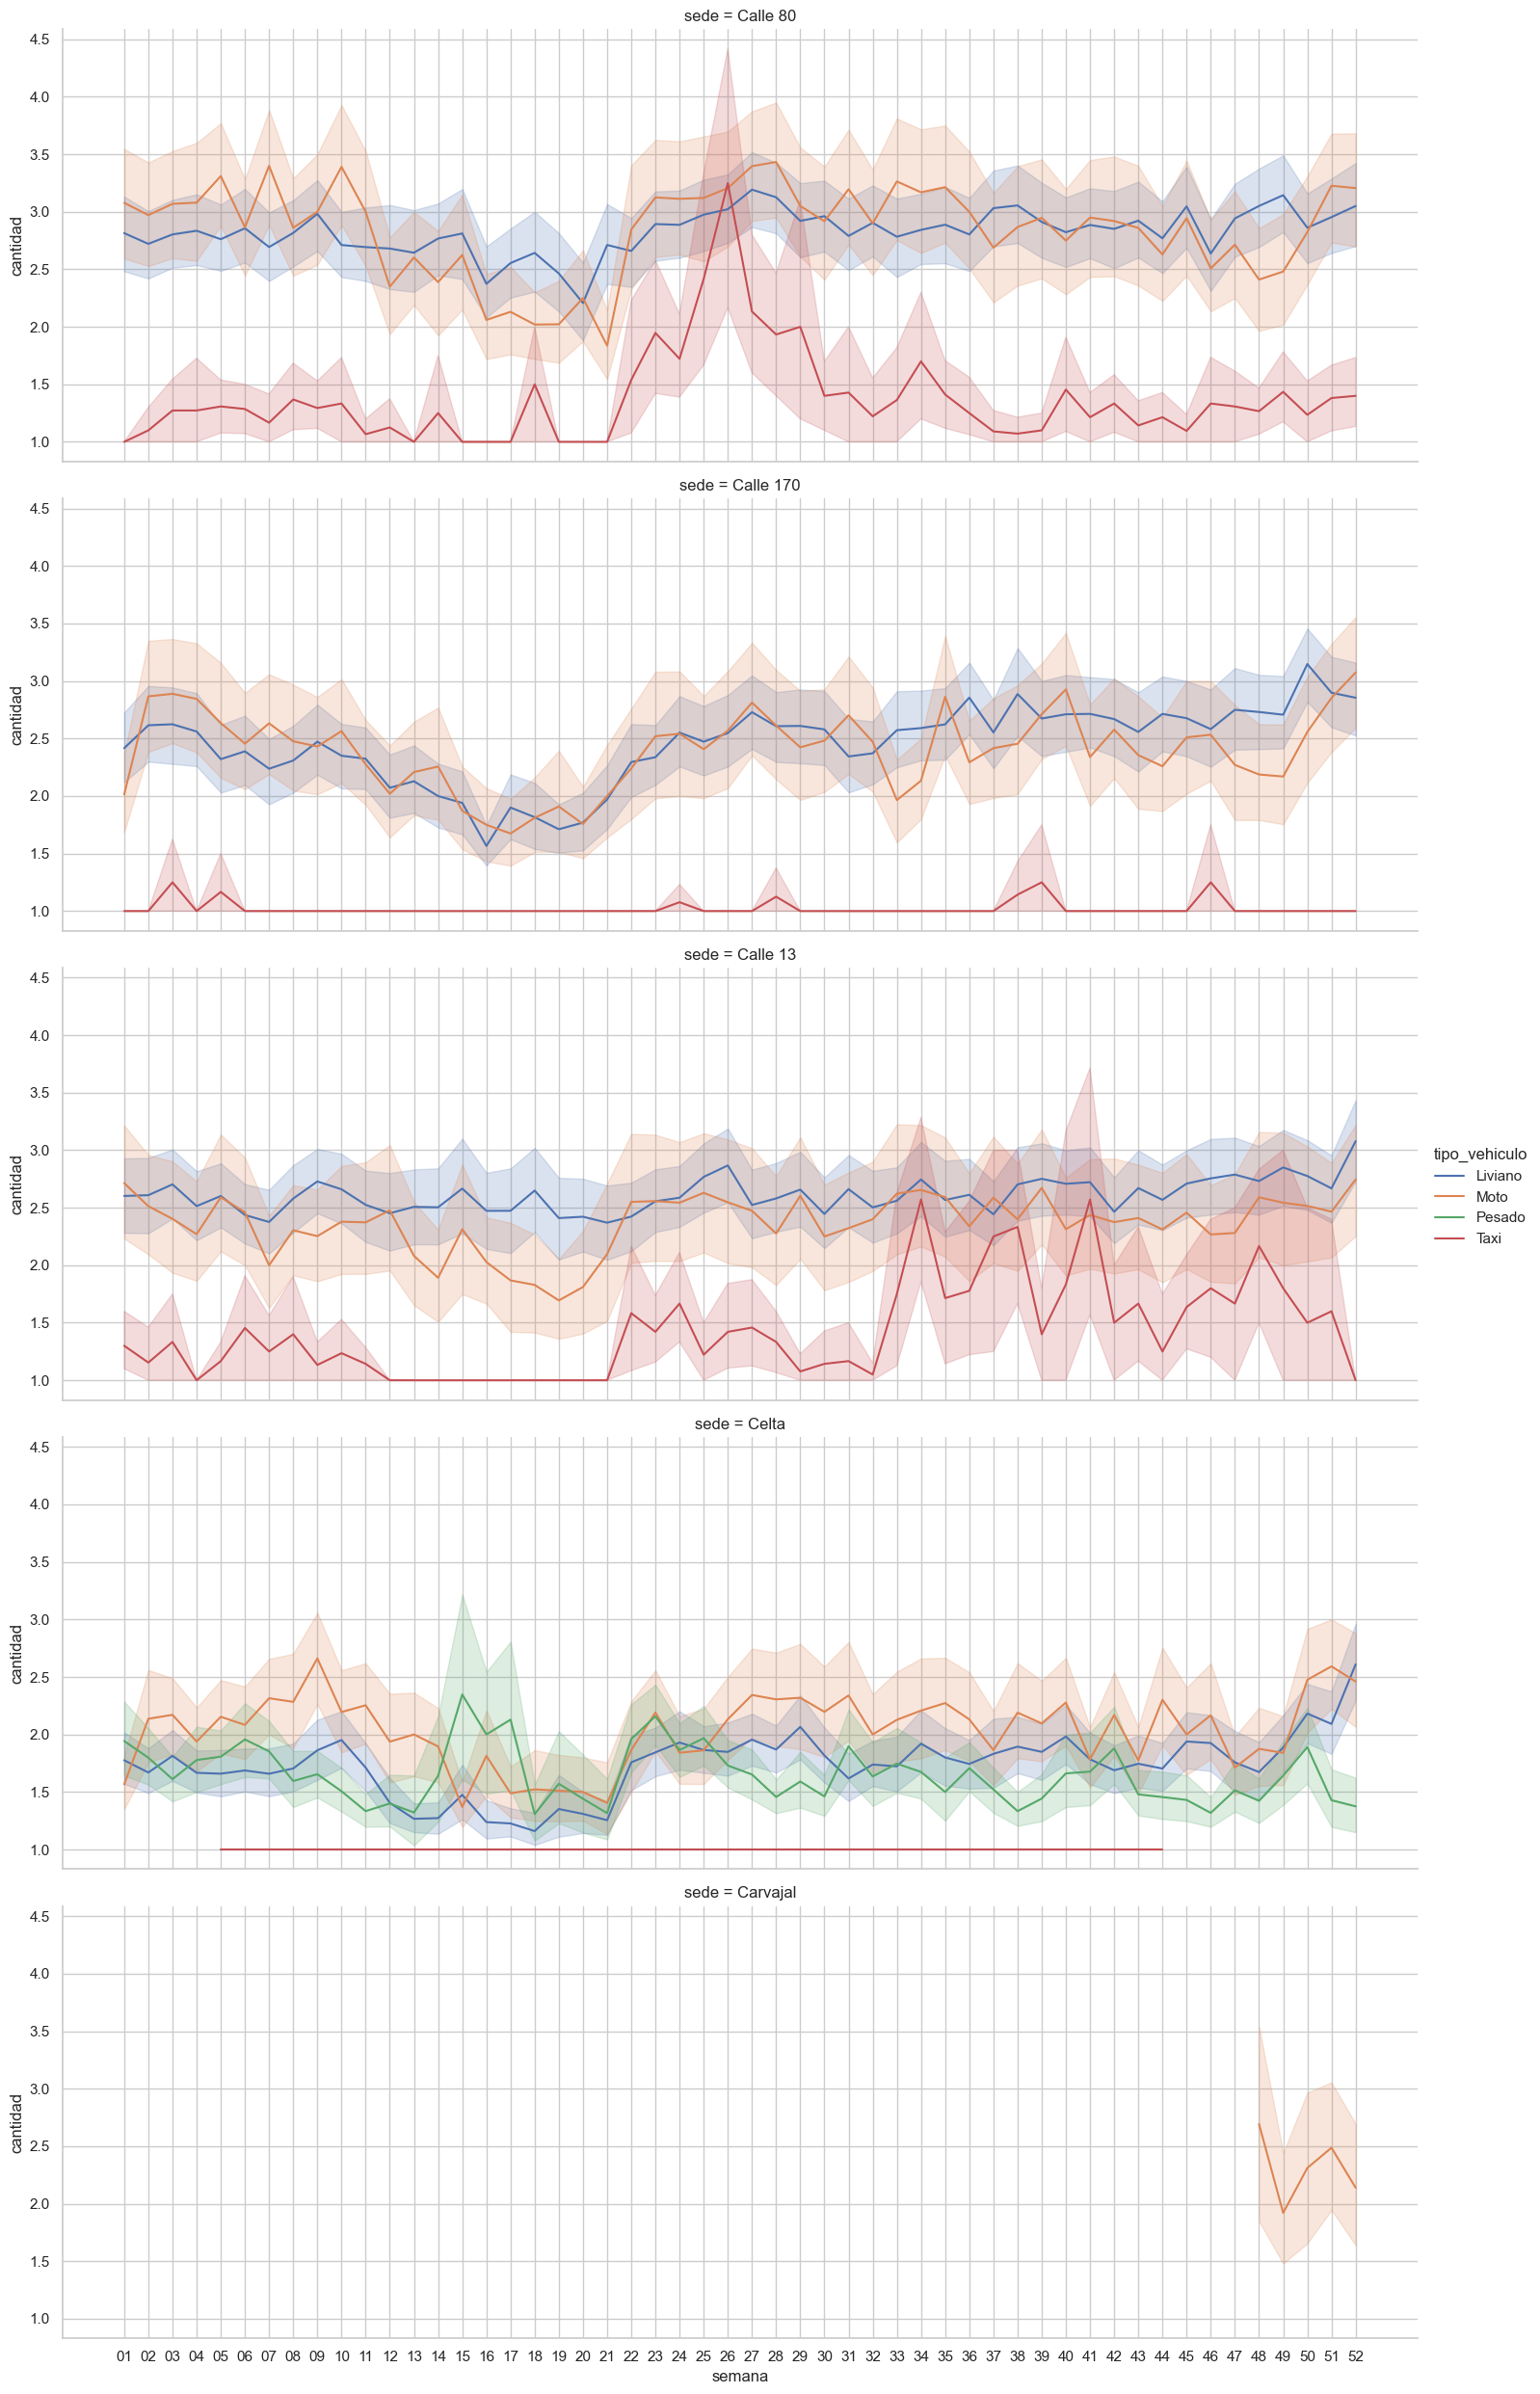

In [47]:
# revxsedeFHTV = ds.groupby(['mes','tipo_vehiculo','sede'])['cantidad'].mean()
# print(revxsedeFHTV)

g = sns.FacetGrid(data=ds, row="sede", hue="tipo_vehiculo", height=5, aspect=15/5).set(title='Revisiones por mes, sede y tipo de vehiculo')
g.map(sns.lineplot, "semana", 'cantidad')
g.add_legend()

Se puede ver que en las sedes calle 80 y calle 170 el flujo se distribuye principalmente en vehículos livianos y motos, en la sede calle 13 el flujo de taxis por temporadas se asimila al de los vehículos livianos y motos, para la sede celta los ingresos de vehículos livianos, pesados y motos es muy similar a lo lardo del año con un pico de vehículos livianos en el mes de mayo.

# Recomendaciones

A primera vista se puede concluir que se es importante tener personal disponible para vehículos livianos la mayor parte posible del año, esto teniendo en cuenta que son los tipos de vehículo que más revisiones generan.

Por otro lado, también se podría sugerir o promover de alguna manera que los empleados tomen sus periodos vacacionales entre las semanas 12 y 21 del año dado la notoria disminución en los servicios durante estas semanas.

Es importante tener personal suficiente los sábados debido a que es el día de la semana que más vehículos se reciben, de igual manera el domingo se puede dar descanso a un mayor número de colaboradores considerando la disminución de las revisiones para estos días.

Finalmente se recomienda adelantar antes del mes de diciembre la contratación de personal de apoyo teniendo en cuenta el incremento de revisiones, especialmente en las últimas tres semanas del año